# Bike Sharing Dataset

## ABSTRACT

The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in Capital Bikeshare's site. This project is divided among two teams- Data Science 12 and Data Analytics 12. The data science team provided us with JSON files after running hyperparameters and we had to use those files and perform various tasks on them.

## 1 INTRODUCTION

### 1.1 Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position.Currently,there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### 1.2 Dataset

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,precipitation,day of week, season, hour of the day, etc. can affect the rental behaviors.The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information.Weather information are extracted from http://www.freemeteo.com.

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## 2 DATA CONVERSION

### 2.1 Extract JSON files

In [ ]:
import os
import glob
path= r'C:\Users\sivat\OneDrive\Desktop\DAE\Dbms\Proj\INFO6105-FinalProject-newzy\HyperparametersDB\1850\*.json'
files=glob.glob(path)

In [ ]:
import pandas as pd
data10=pd.read_json(files[-10])
data10

Out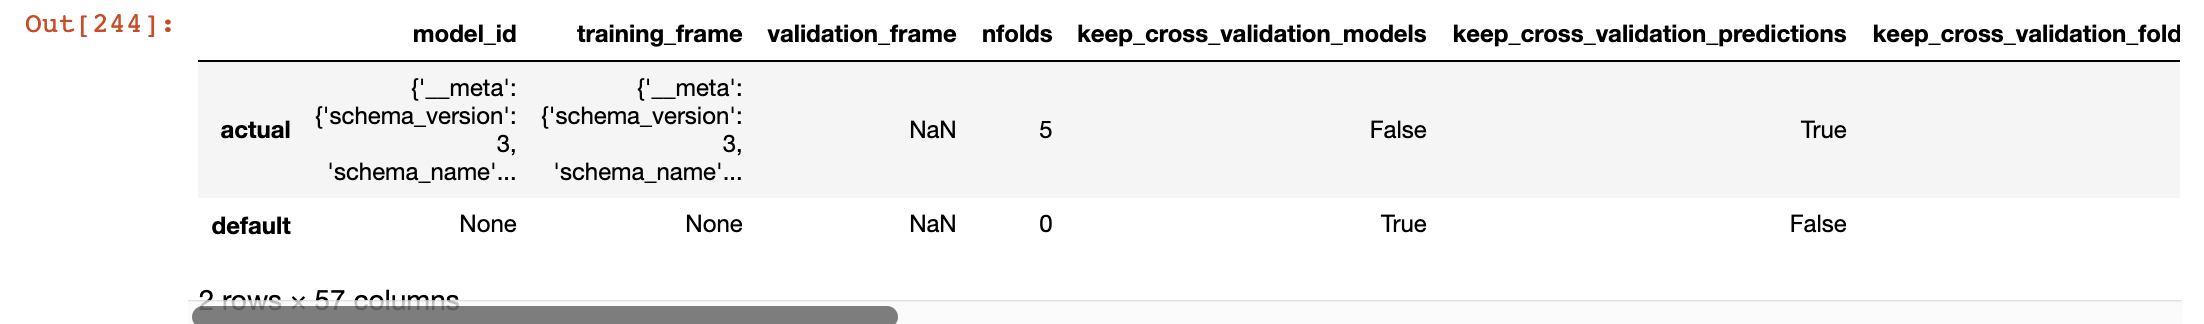

In [ ]:
print(data10.training_frame["actual"])

In [ ]:
for f in files:
    print(f)

Out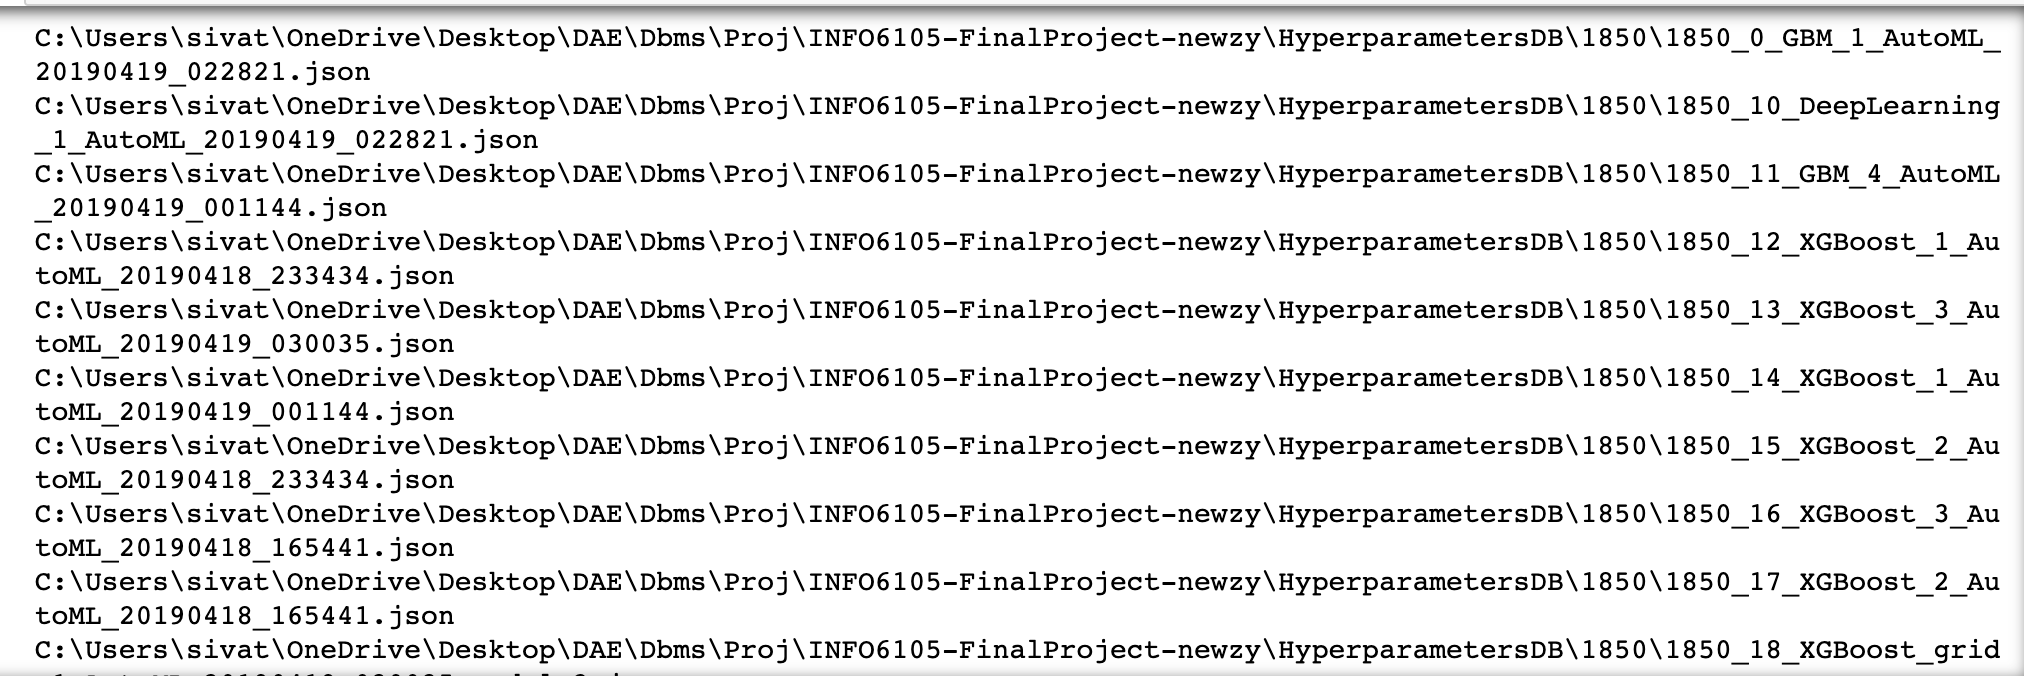

In [ ]:
dict={'XGBoost':["nfolds","ntrees","max_depth","max_leaves","booster","reg_alpha","validation_frame","training_frame","model_id"],"GLM":["nfolds","max_iterations","early_stopping","alpha","lambda","validation_frame","training_frame","model_id"],
     "GBM":["nfolds","ntrees","max_depth","min_rows","learn_rate","validation_frame","training_frame","model_id"],"XRT":["nfolds","ntrees","class_sampling_factors","fold_column","balance_classes","model_id"],
     "DRF":["validation_frame","training_frame","nfolds","ntrees","max_depth","max_runtime_secs","model_id"],"StackedEnsemble":["metalearner_nfolds","seed","keep_levelone_frame","metalearner_fold_column","validation_frame","training_frame","model_id"],
     "DeepLearning":["nfolds","balance_classes","rate","loss","validation_frame","training_frame","model_id"]}

In [ ]:
for keys in dict:
    print(dict[keys])
    print(keys)

Out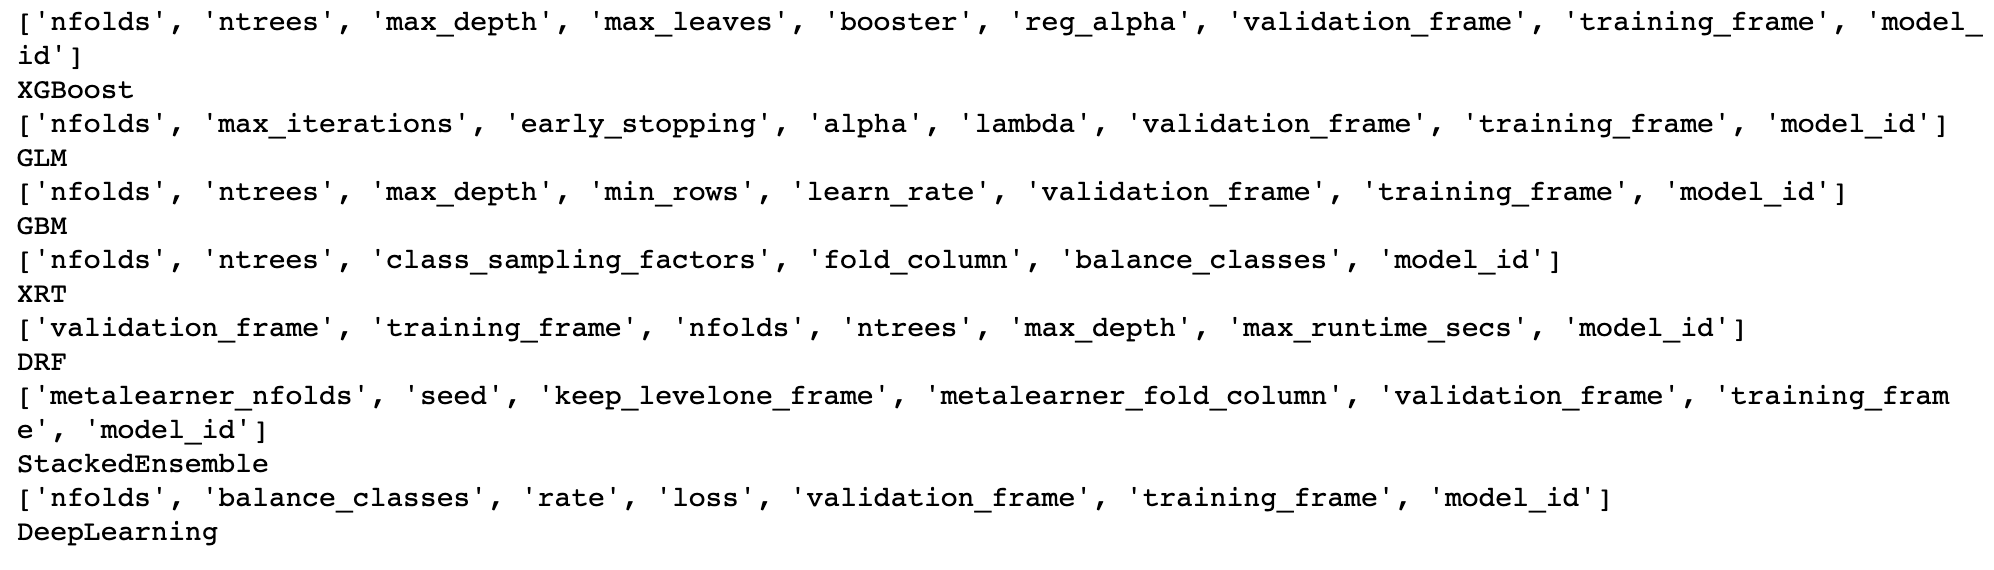

In [ ]:
hp_XGBoost_1850=pd.DataFrame(columns=dict["XGBoost"])
hp_GLM_1850=pd.DataFrame(columns=dict["GLM"])
hp_GBM_1850=pd.DataFrame(columns=dict["GBM"])
hp_XRT_1850=pd.DataFrame(columns=dict["XRT"])
hp_DRF_1850=pd.DataFrame(columns=dict["DRF"])
hp_StackedEnsemble_1850=pd.DataFrame(columns=dict["StackedEnsemble"])
hp_DeepLearning_1850=pd.DataFrame(columns=dict["DeepLearning"])

In [ ]:
for f in files:
    if "XGBoost" in f:
        data1=pd.read_json(f)
        datat=data1.transpose()
        data1["model_id"]=datat.actual["model_id"]["name"]
        data1["training_frame"]=datat.actual["training_frame"]["name"]
        data2=data1[dict["XGBoost"]].copy()
        data3=data2.drop("default")
        hp_XGBoost_1850=pd.concat([hp_XGBoost_1850,data3],join="inner")
        hp_XGBoost_1850["runtime"]=1850
    elif "GLM" in f:
        data1=pd.read_json(f)
        datat=data1.transpose()
        data1["model_id"]=datat.actual["model_id"]["name"]
        data1["training_frame"]=datat.actual["training_frame"]["name"]
        data2=data1[dict["GLM"]].copy()
        data3=data2.drop("default")
        hp_GLM_1850=pd.concat([hp_GLM_1850,data3],join="inner")
        hp_GLM_1850["runtime"]=1850
    elif "GBM" in f:
        data1=pd.read_json(f)
        datat=data1.transpose()
        data1["model_id"]=datat.actual["model_id"]["name"]
        data1["training_frame"]=datat.actual["training_frame"]["name"]
        data2=data1[dict["GBM"]].copy()
        data3=data2.drop("default")
        hp_GBM_1850=pd.concat([hp_GBM_1850,data3],join="inner")
        hp_GBM_1850["runtime"]=1850
    elif "XRT" in f:
        data1=pd.read_json(f)
        datat=data1.transpose()
        data1["model_id"]=datat.actual["model_id"]["name"]
        data1["training_frame"]=datat.actual["training_frame"]["name"]
        data2=data1[dict["XRT"]].copy()
        data3=data2.drop("default")
        hp_XRT_1850=pd.concat([hp_XRT_1850,data3],join="inner")
        hp_XRT_1850["runtime"]=1850
    elif "DRF" in f:
        data1=pd.read_json(f)
        datat=data1.transpose()
        data1["model_id"]=datat.actual["model_id"]["name"]
        data1["training_frame"]=datat.actual["training_frame"]["name"]
        data2=data1[dict["DRF"]].copy()
        data3=data2.drop("default")
        hp_DRT_1850=pd.concat([hp_DRF_1850,data3],join="inner")
        hp_DRT_1850["runtime"]=1850
    elif "StackedEnsemble" in f:
        data1=pd.read_json(f)
        datat=data1.transpose()
        data1["model_id"]=datat.actual["model_id"]["name"]
        data1["training_frame"]=datat.actual["training_frame"]["name"]
        data2=data1[dict["StackedEnsemble"]].copy()
        data3=data2.drop("default")
        hp_StackedEnsemble_1850=pd.concat([hp_StackedEnsemble_1850,data3],join="inner")
        hp_StackedEnsemble_1850["runtime"]=1850
    elif "DeepLearning" in f:
        data1=pd.read_json(f)
        datat=data1.transpose()
        data1["model_id"]=datat.actual["model_id"]["name"]
        data1["training_frame"]=datat.actual["training_frame"]["name"]
        data2=data1[dict["DeepLearning"]].copy()
        data3=data2.drop("default")
        hp_DeepLearning_1850=pd.concat([hp_DeepLearning_1850,data3],join="inner")
        hp_DeepLearning_1850["runtime"]=1850

In [ ]:
hp_XGBoost_1850.to_csv("hp_XGBoost_1850.CSV")

Similarly,we saved all the files to csv after this loop.

### 2.2 Extract Error Files:

In [ ]:
import os
import glob
path= r'C:\Users\sivat\OneDrive\Desktop\DAE\Dbms\Proj\INFO6105-FinalProject-newzy\MetaData\1850\*_stats.json'
files=glob.glob(path)

In [ ]:
print(files)

In [ ]:
import pandas as pd
import json

In [ ]:
for f in files:
    if "test" in f:
        files.remove(f)

In [ ]:
print(files)

In [ ]:
data=pd.read_json(files[2])
data

Out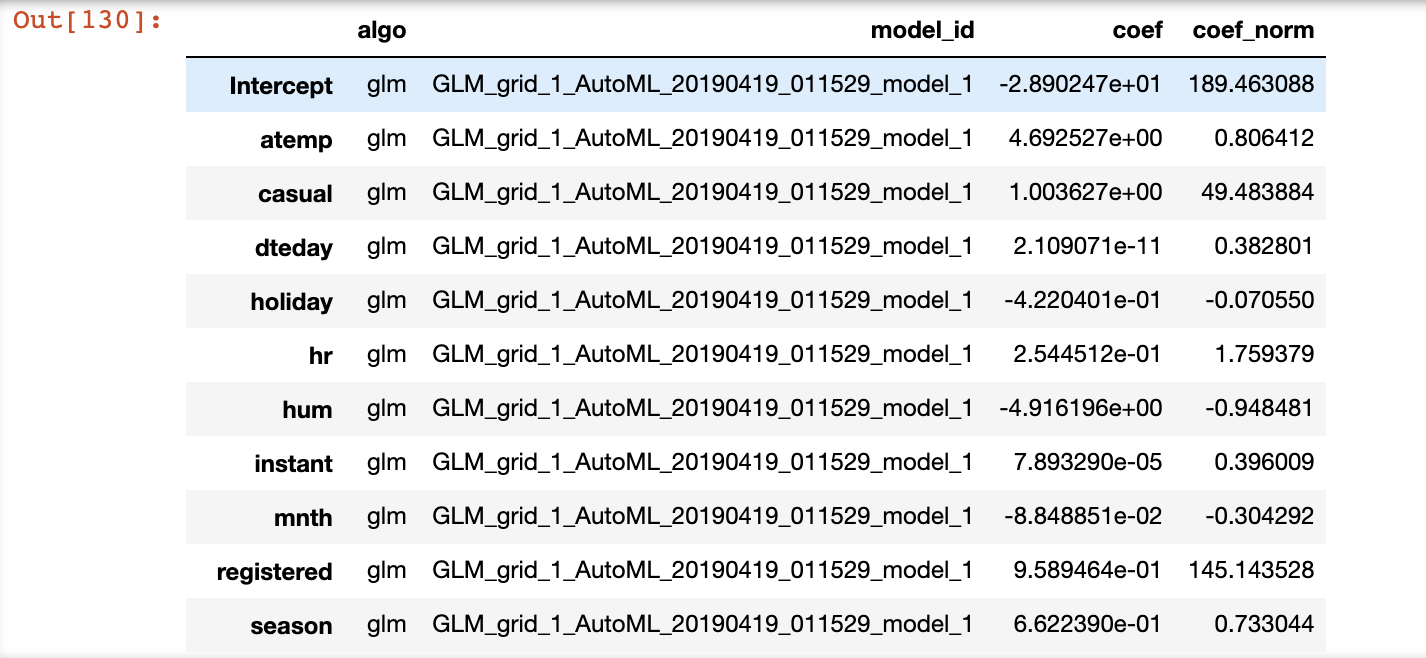

In [ ]:
data=pd.read_json(files[0])
coef=[]
coef_norm=[]
var=[]
for i in range(data.shape[0]):
    var.append(data["varimp"][i][0])
    coef.append(data["varimp"][i][1])
    coef_norm.append(data["varimp"][i][2])
data["var"]=var
data["coef"]=coef
data["coef_norm"]=coef_norm
data1=data.drop(["varimp"],axis=1)
data1

Out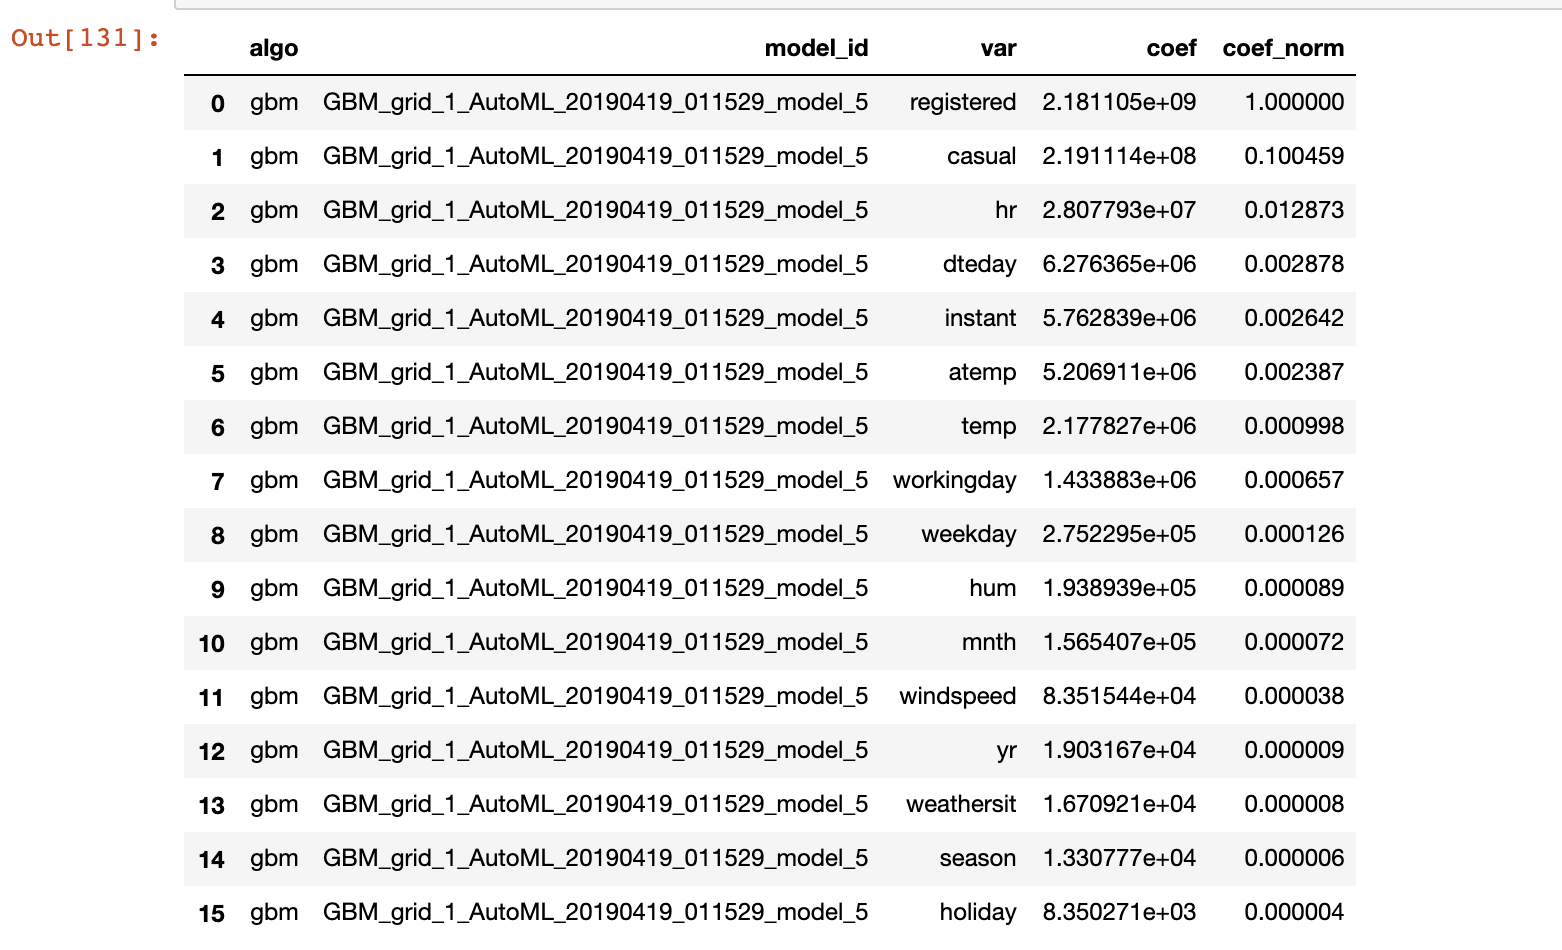

In [ ]:
c=1
for f in files:
    data2=pd.read_json(f)
    coef=[]
    coef_norm=[]
    var=[]
    if "varimp" in data2.columns:
        for i in range(data2.shape[0]):
            var.append(data2["varimp"][i][0])
            coef.append(data2["varimp"][i][1])
            coef_norm.append(data2["varimp"][i][2])
        data2["var"]=var
        data2["coef"]=coef
        data2["coef_norm"]=coef_norm
        data3=data2.drop(["varimp"],axis=1)
        data3.to_csv("a"+"1850"+str(c)+".csv")
    else:
        data.to_csv("a"+"1850"+str(c)+".csv")
    c=c+1

## 3 SCHEMA AND ENTITY-RELATIONSHIP

Schema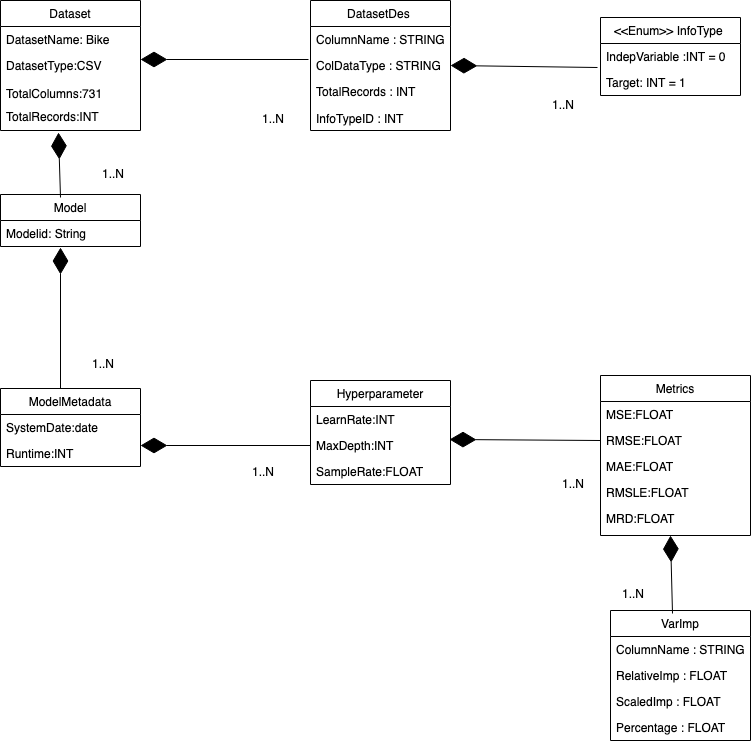

ER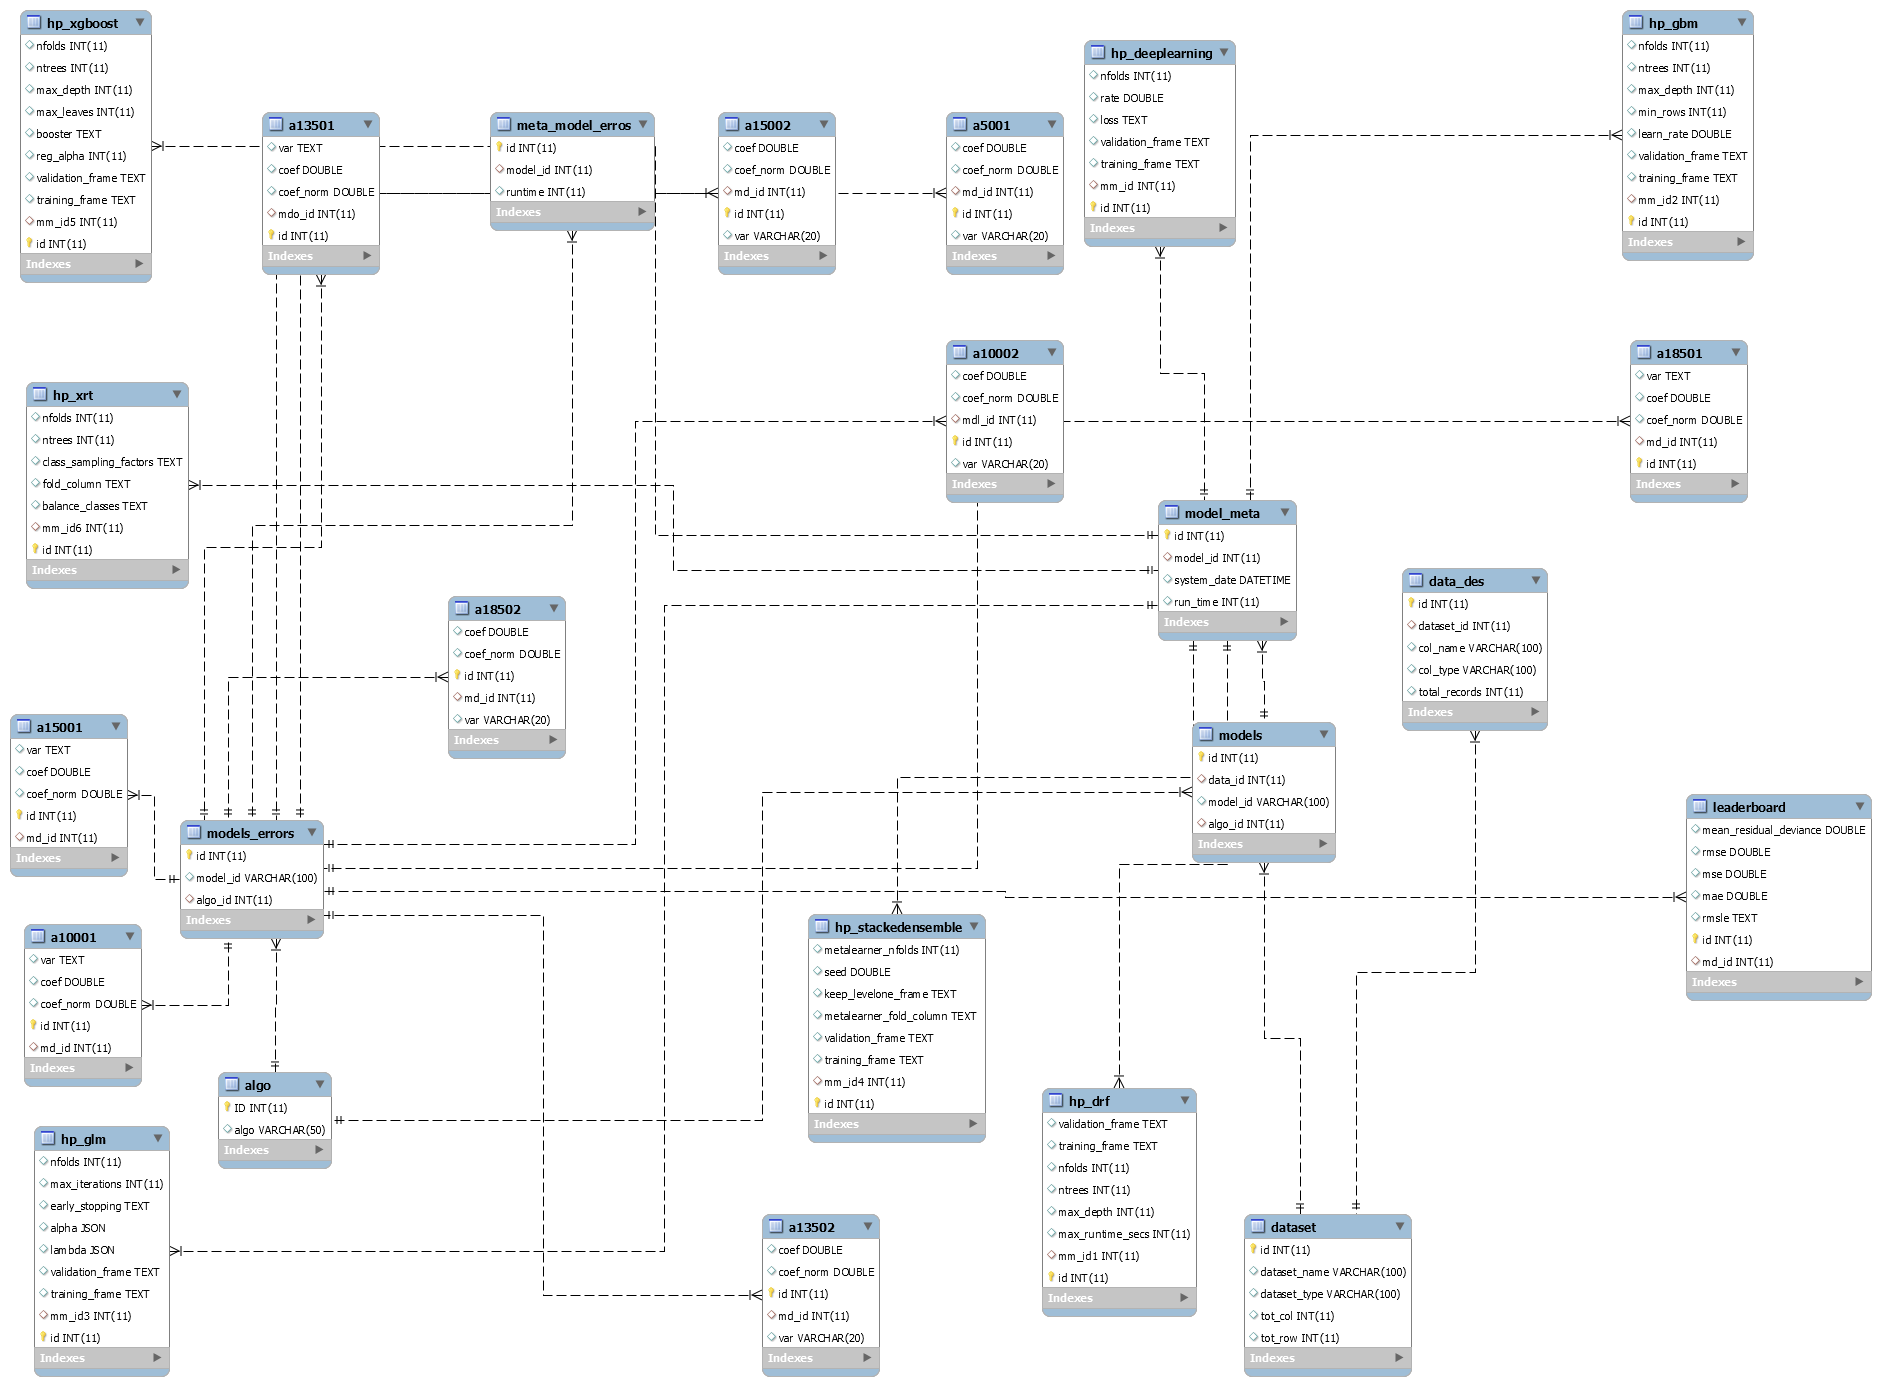

## 4 USE CASES,FUNCTIONS,VIEWS

### 4.1.1 Use Cases:

To find all the leaderboard values for a particular algo, here GBM.

use_case_1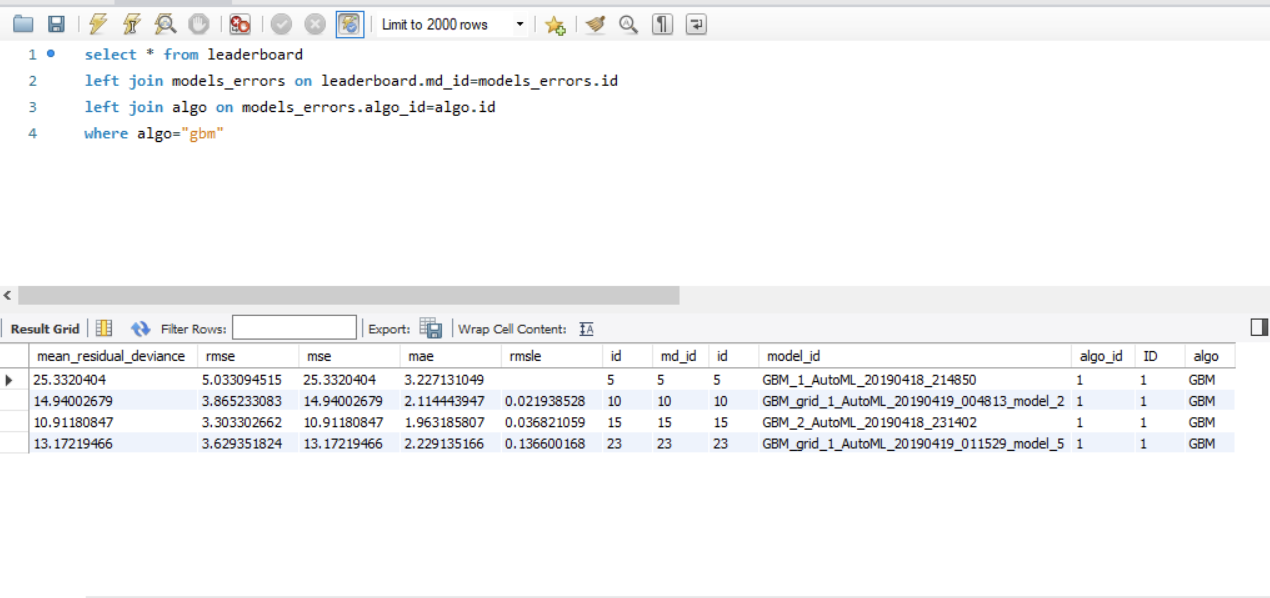

To find the model_id from list for particular algo,here GBM.

use_case_2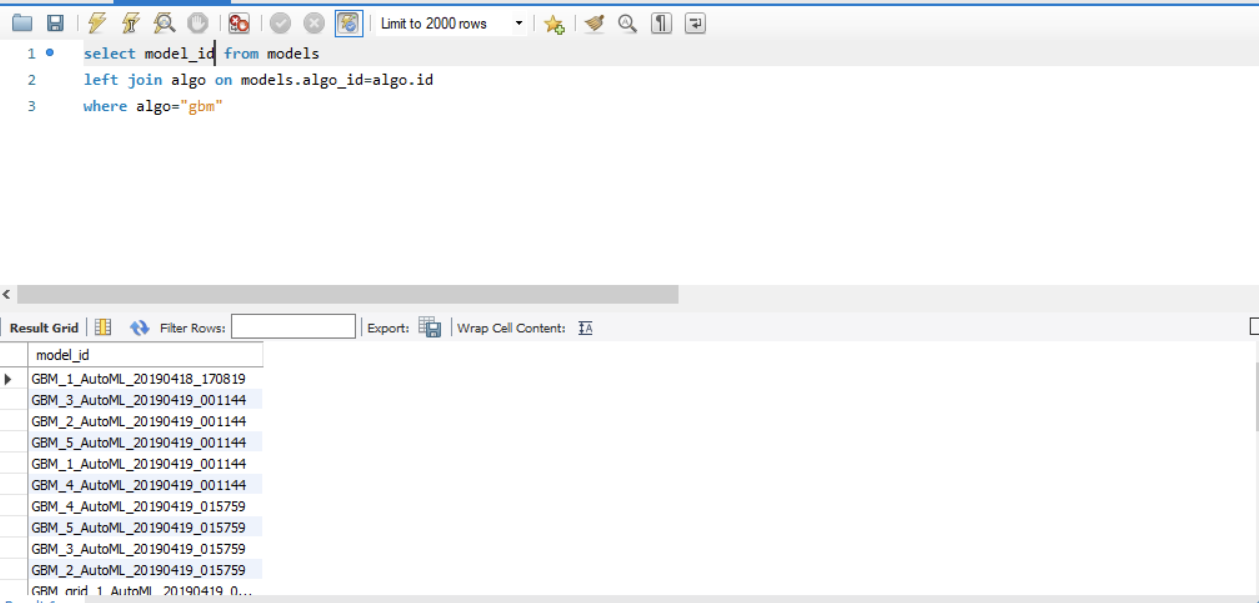

To find the errors for algo mentioned.

use_case_3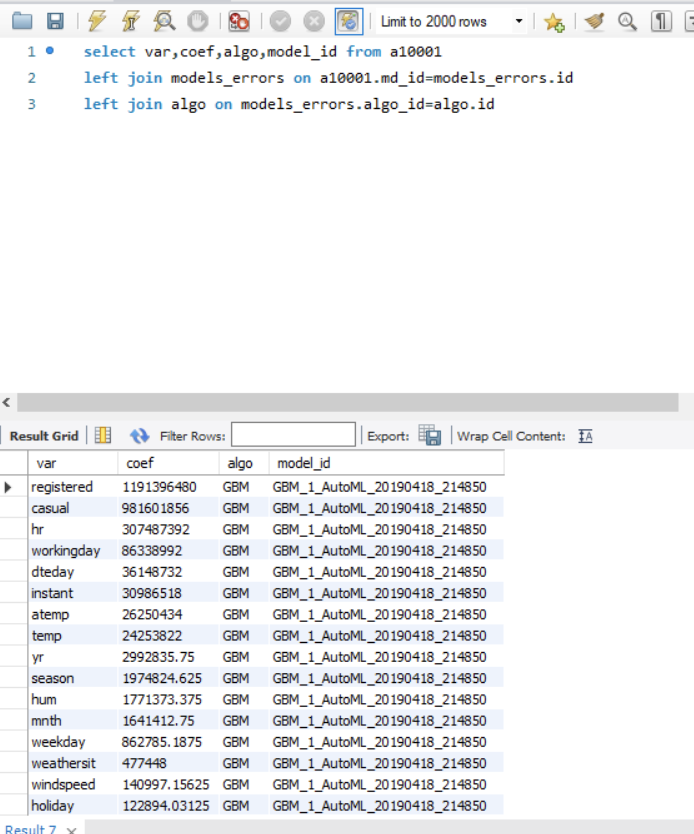

To find the hyperparameters's details with a specified runtime.

use_case_4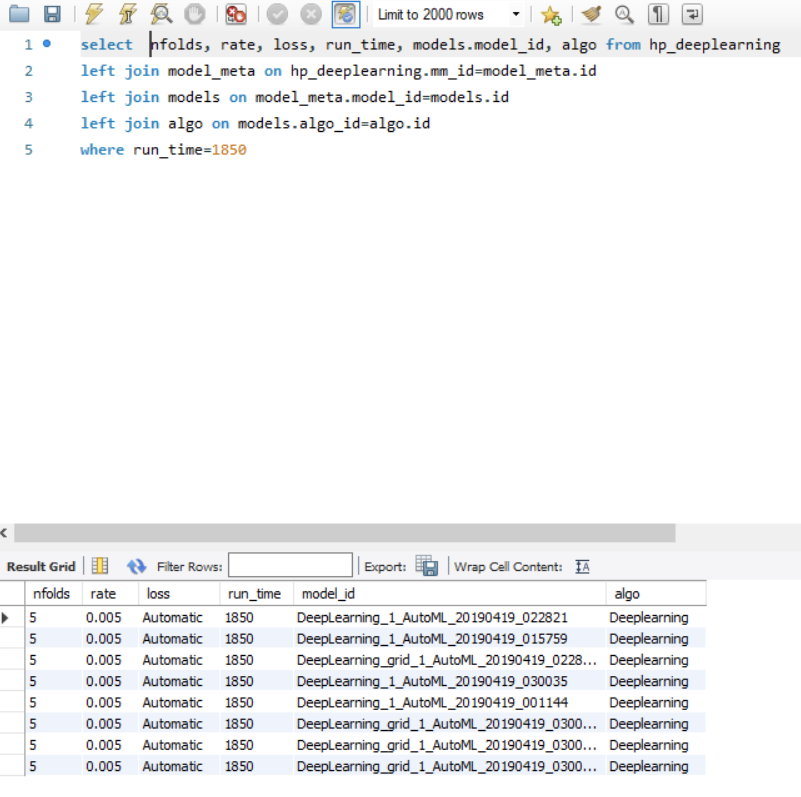

Use Case 5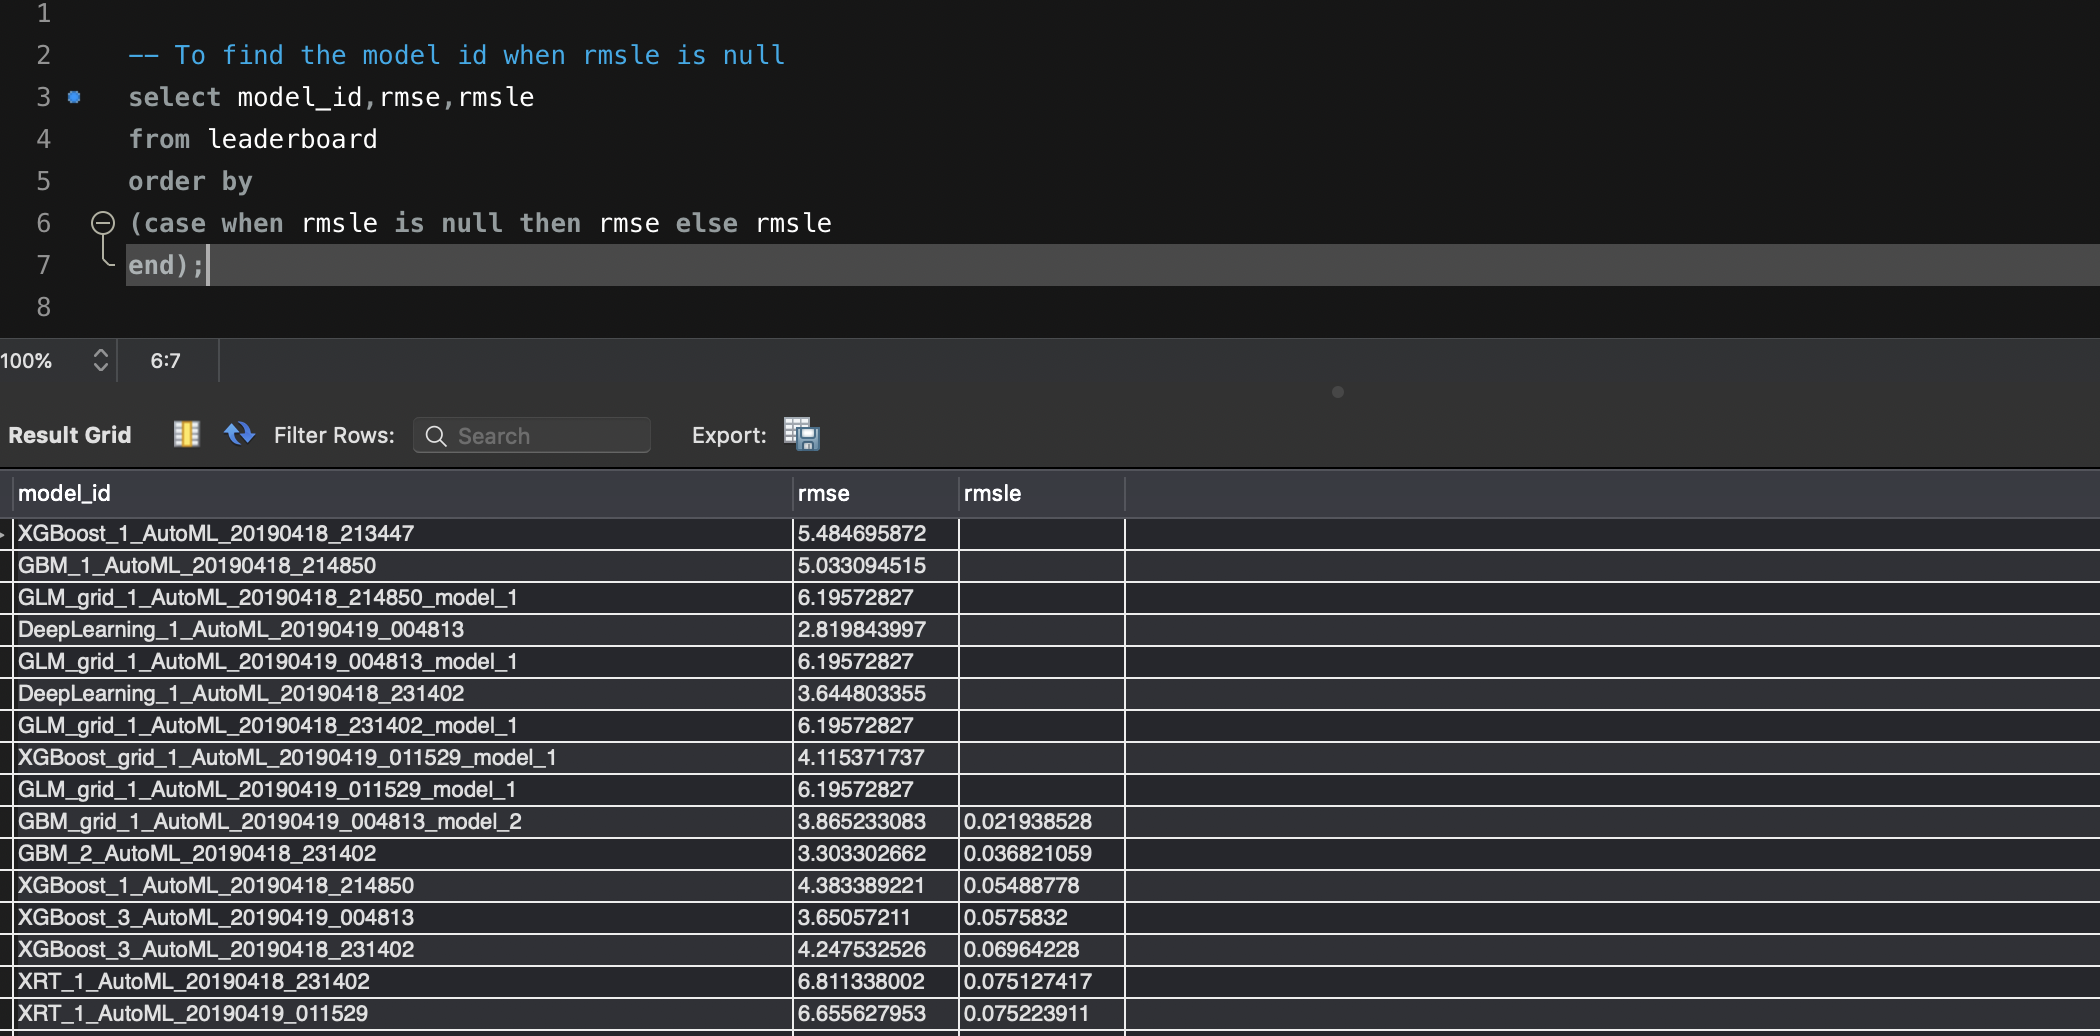

Use Case 6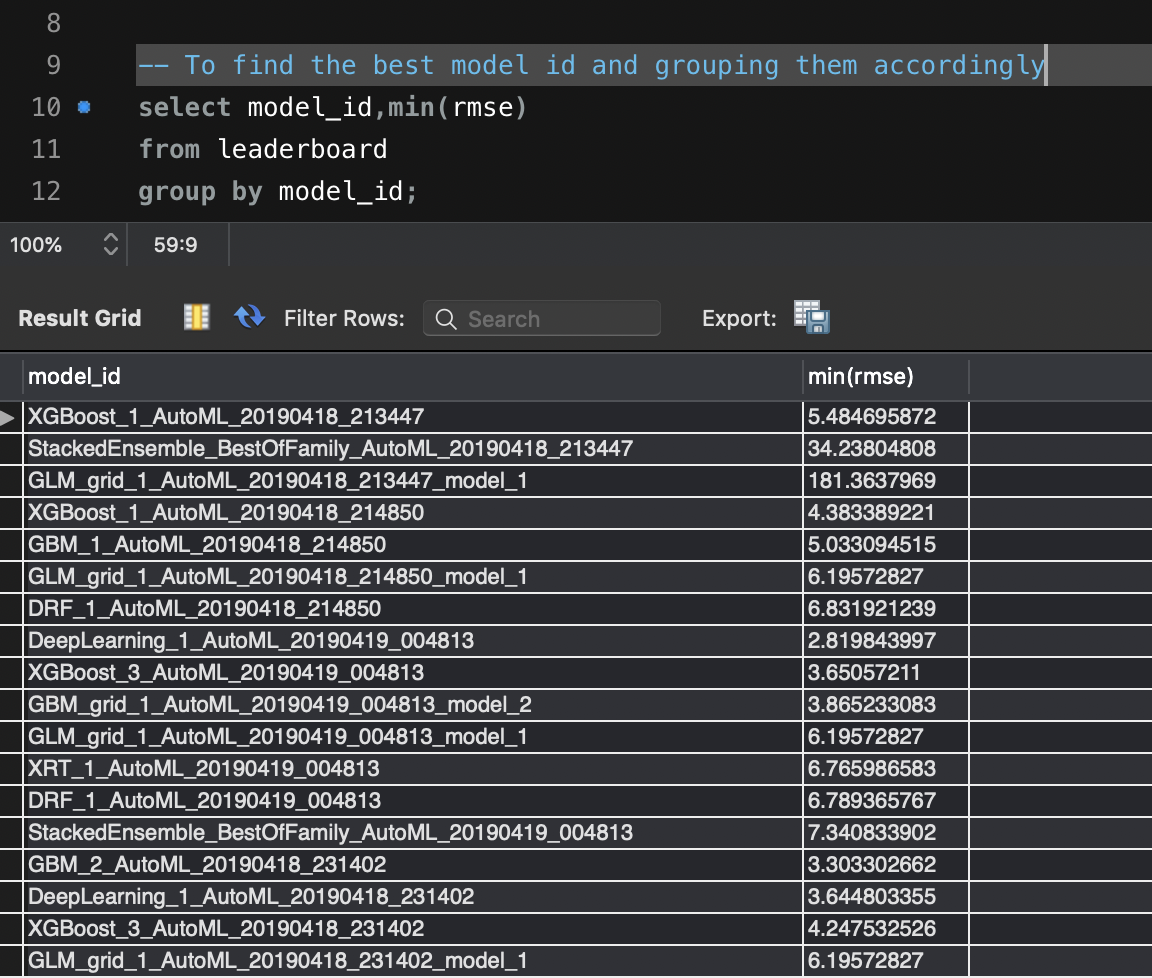

Use Case 7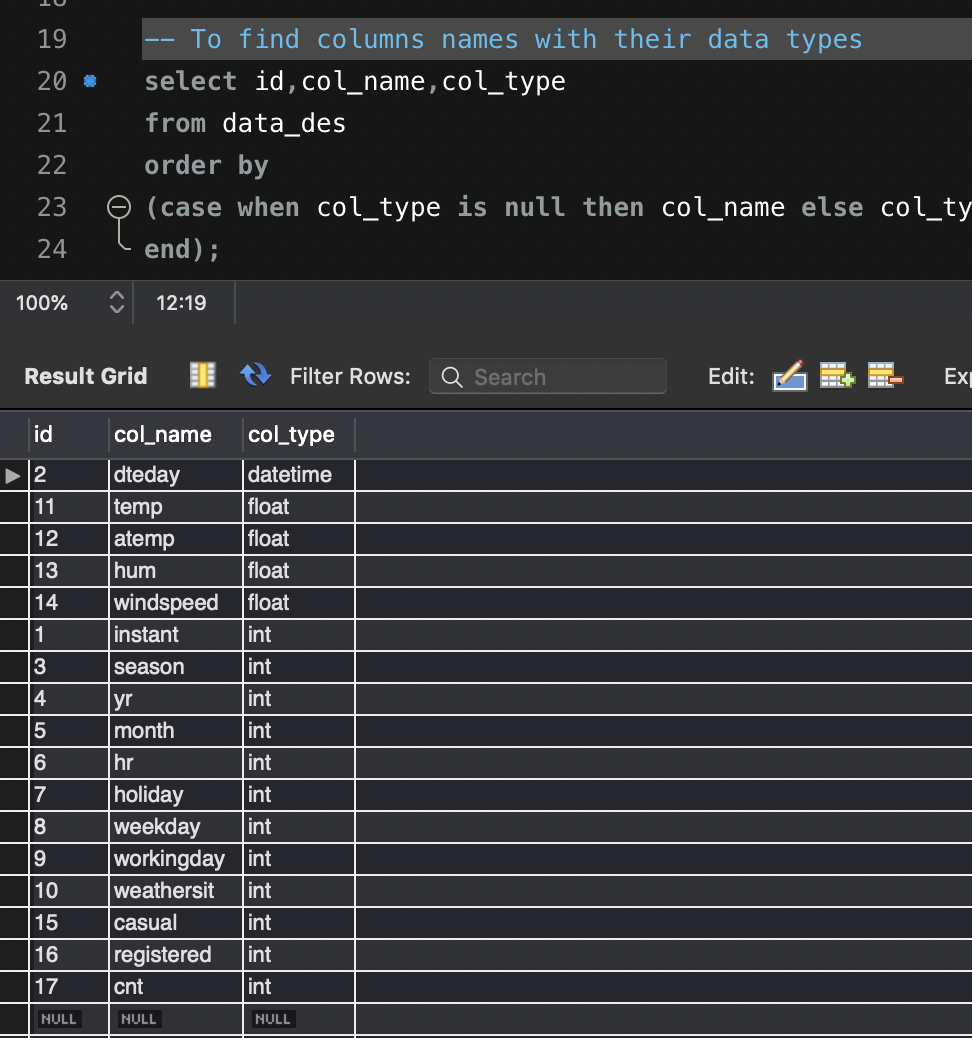

Use Case 8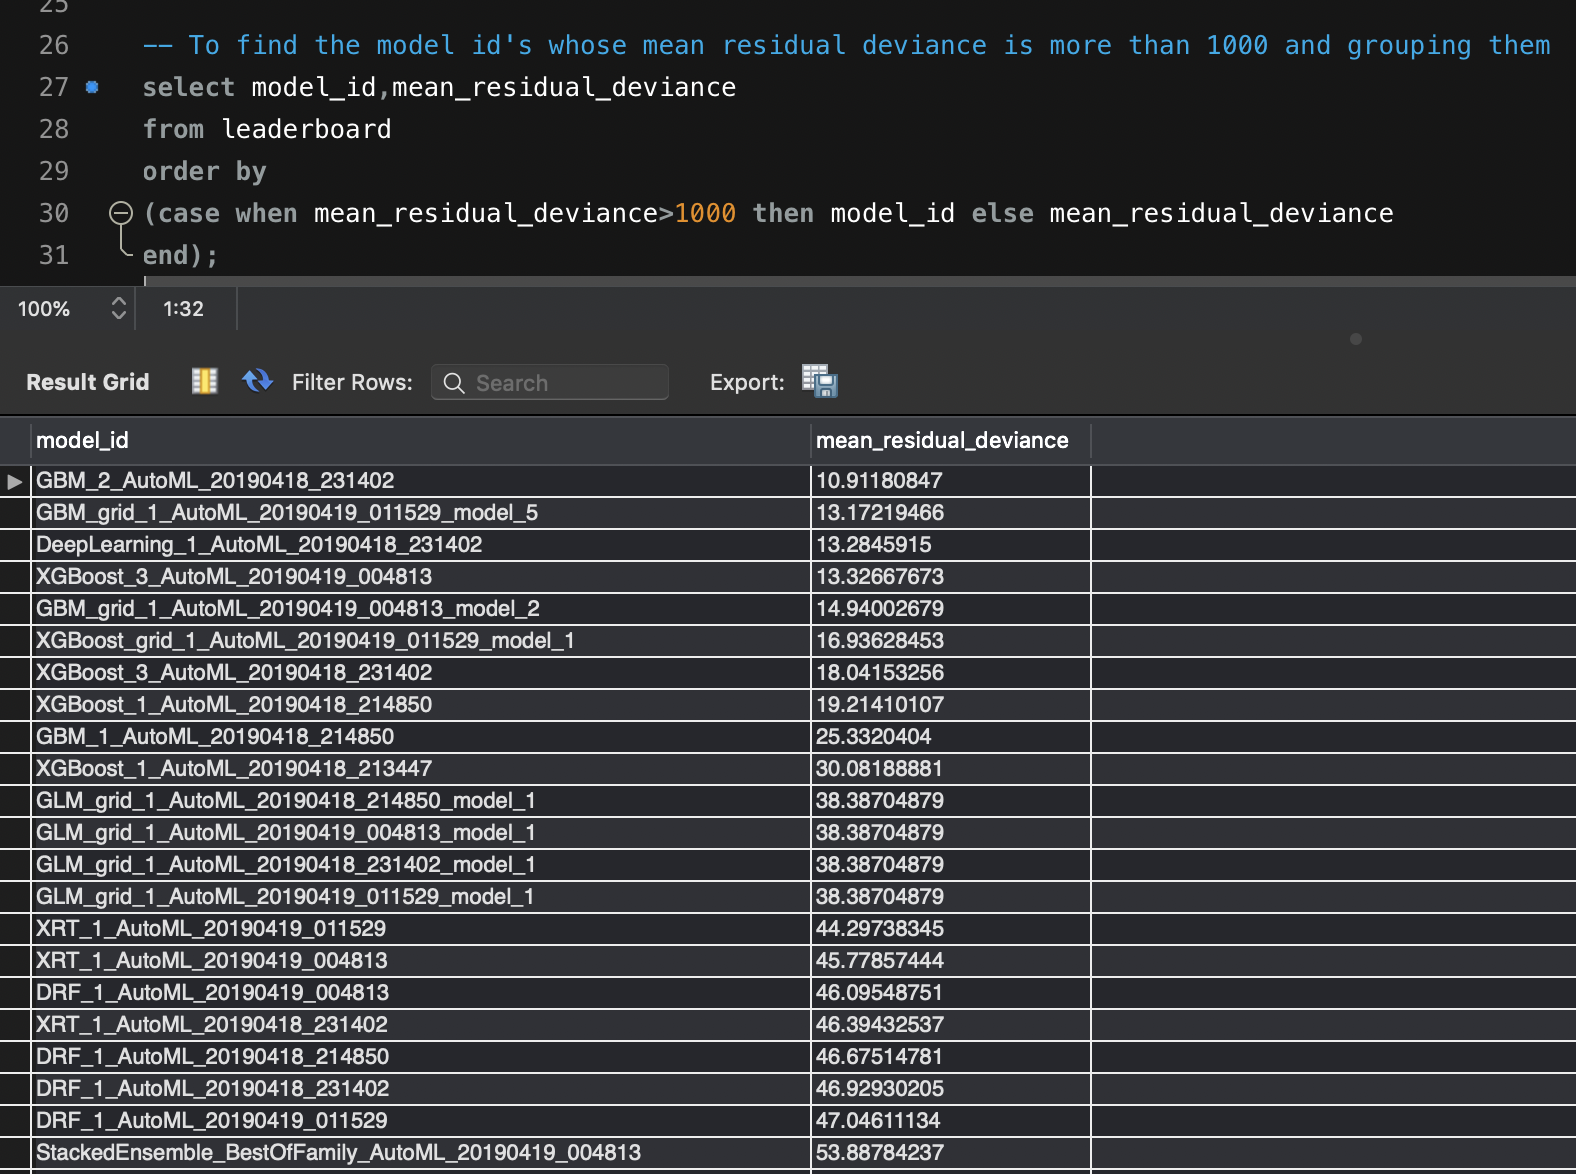

Use Case 9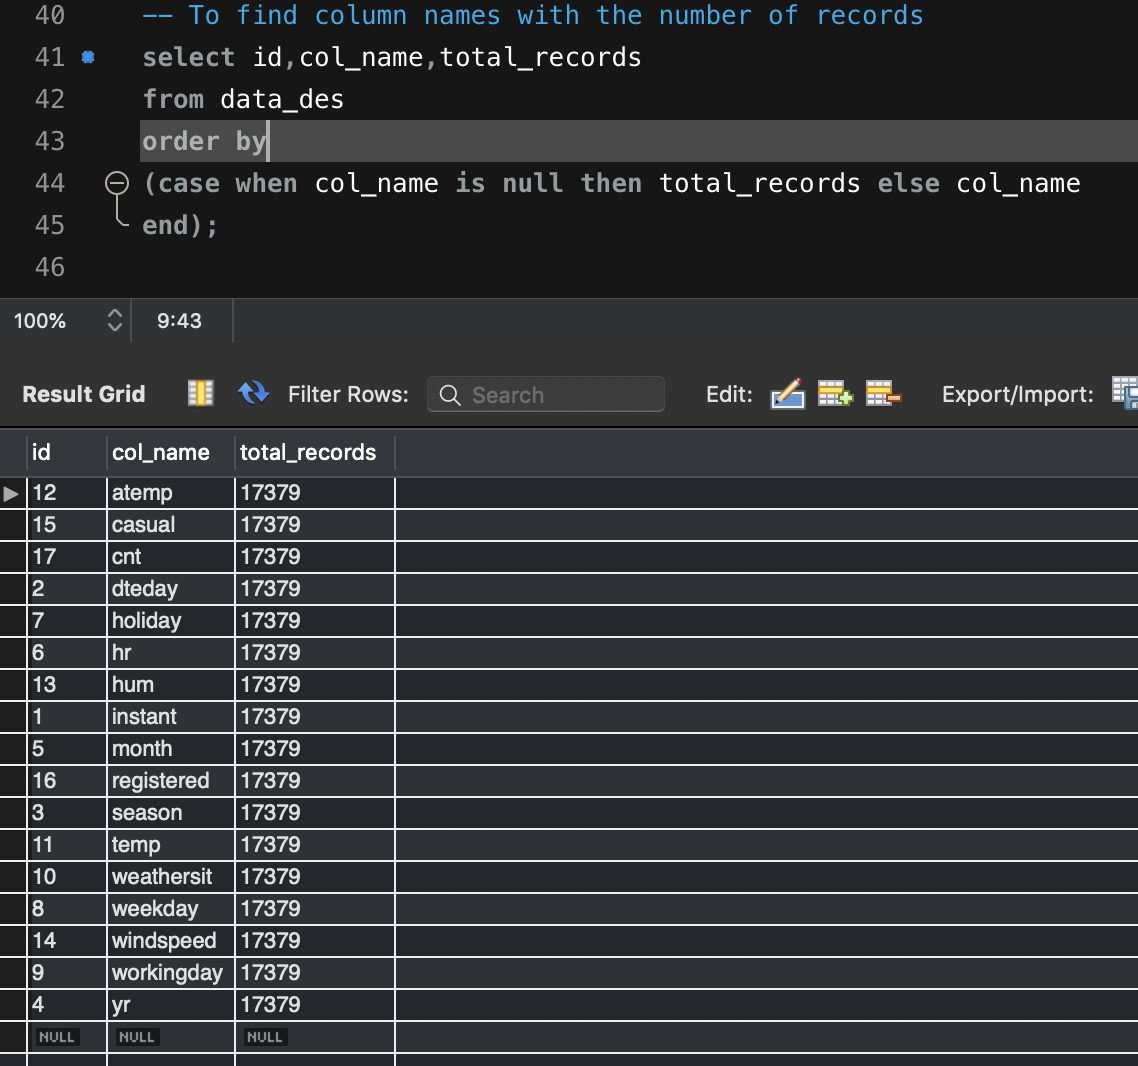

Use Case 10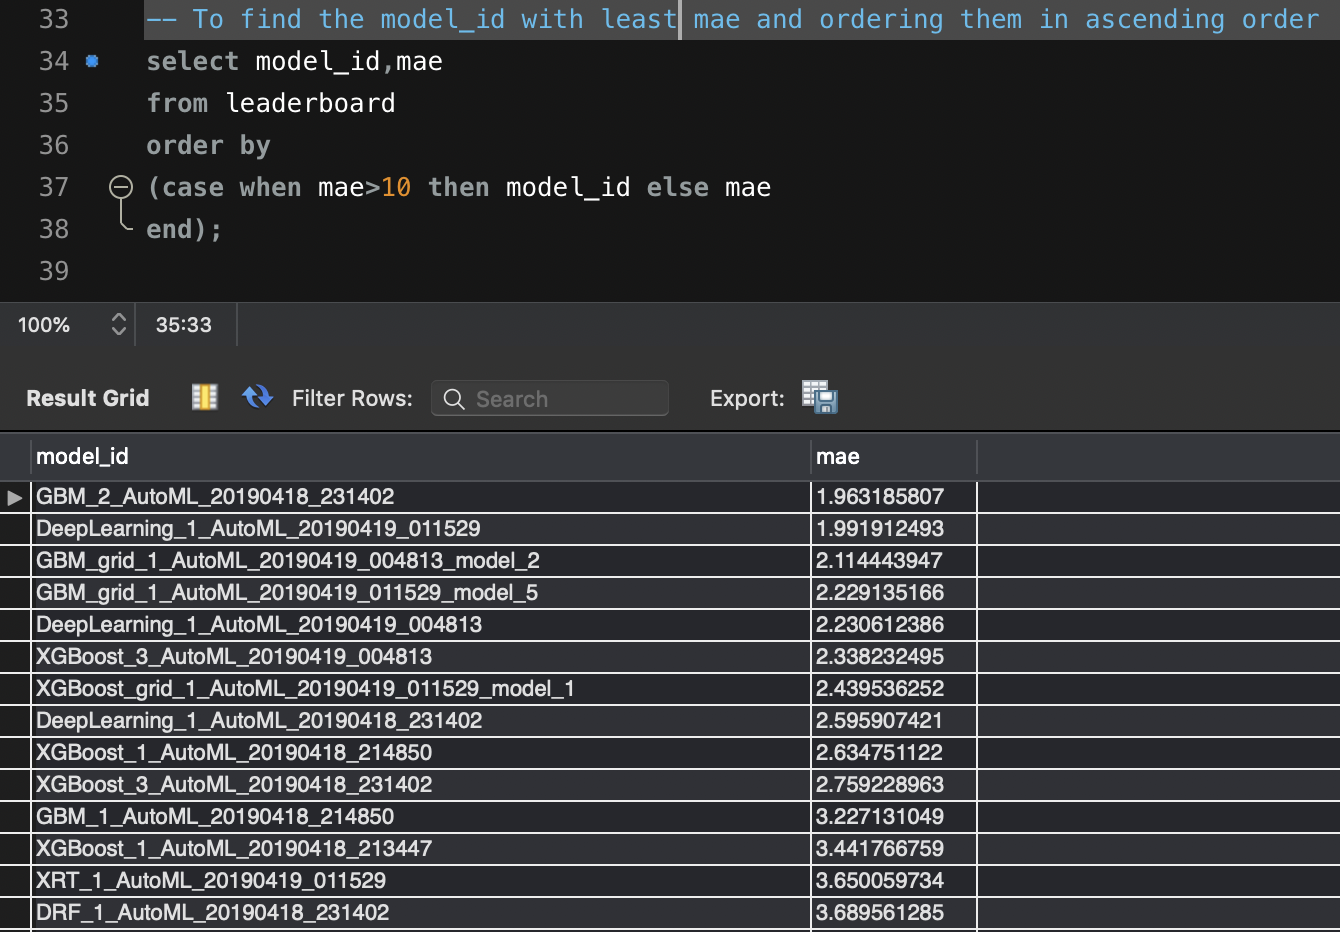

### 4.2 Functions:

Function 1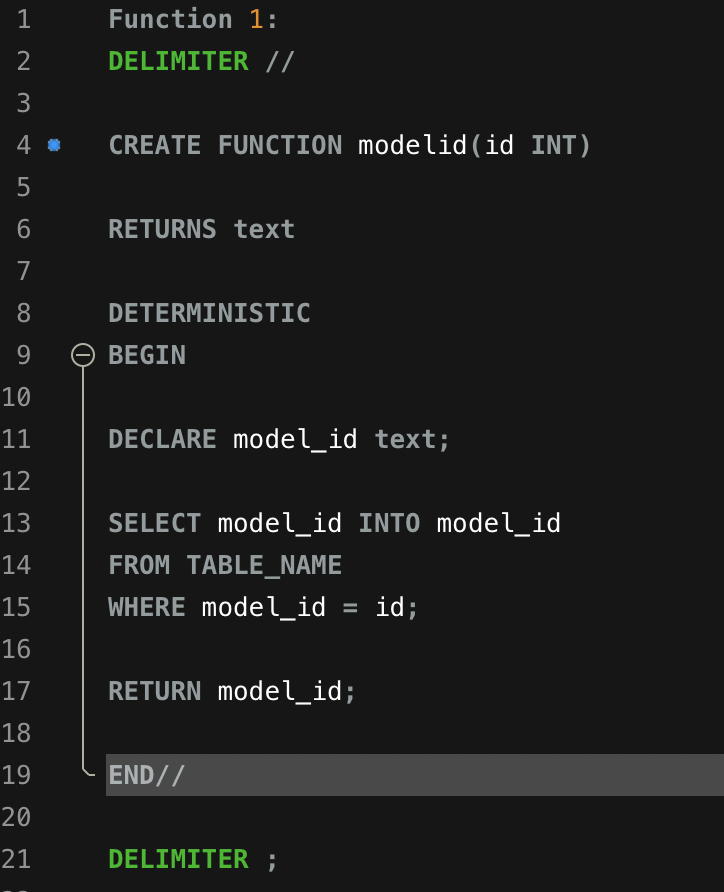

Function 2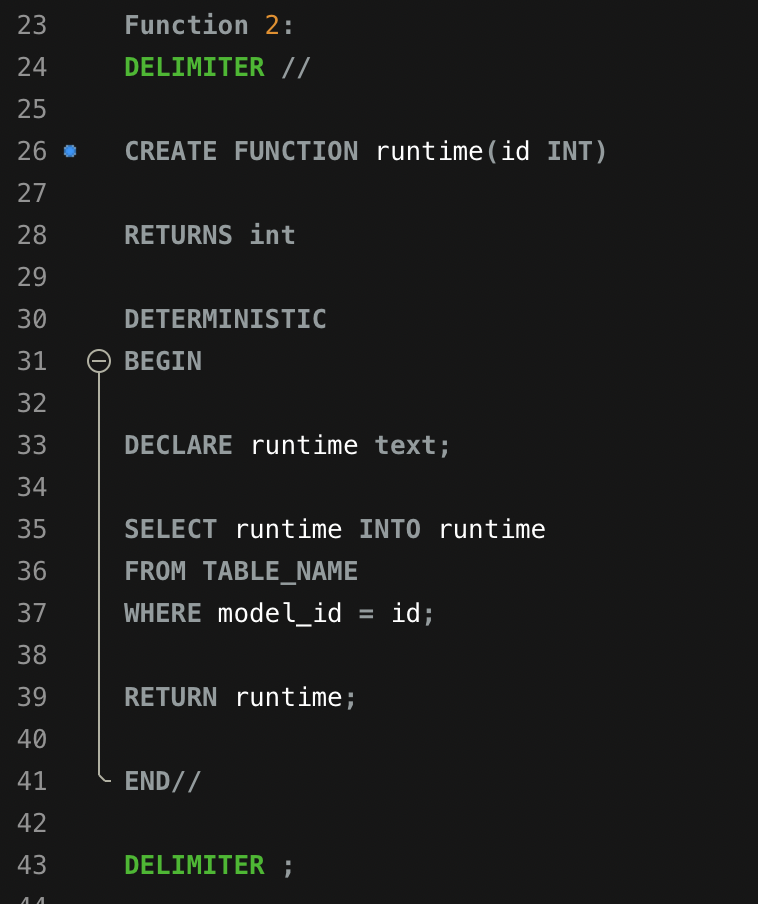

Function 3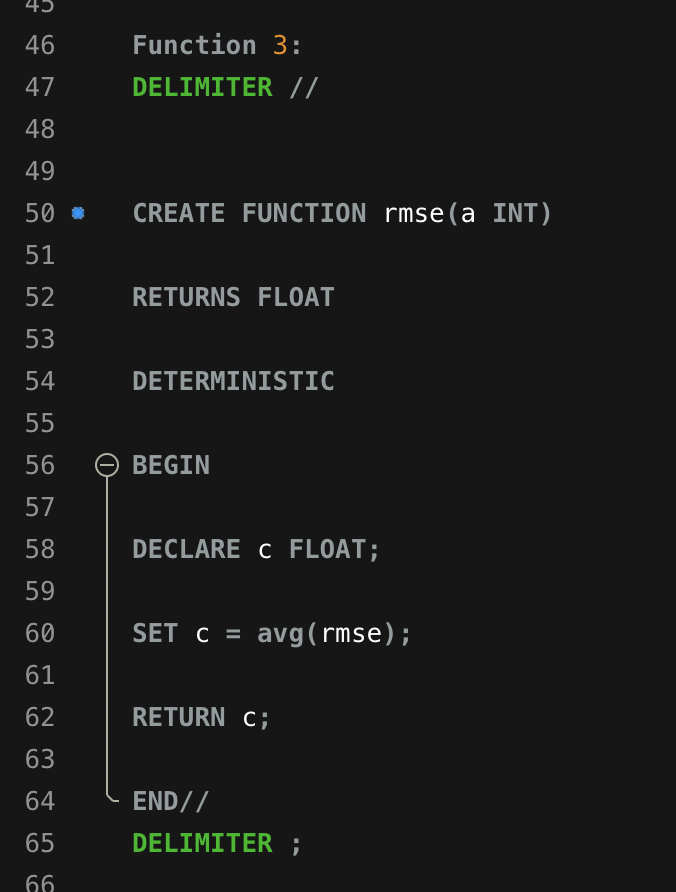

Functin 4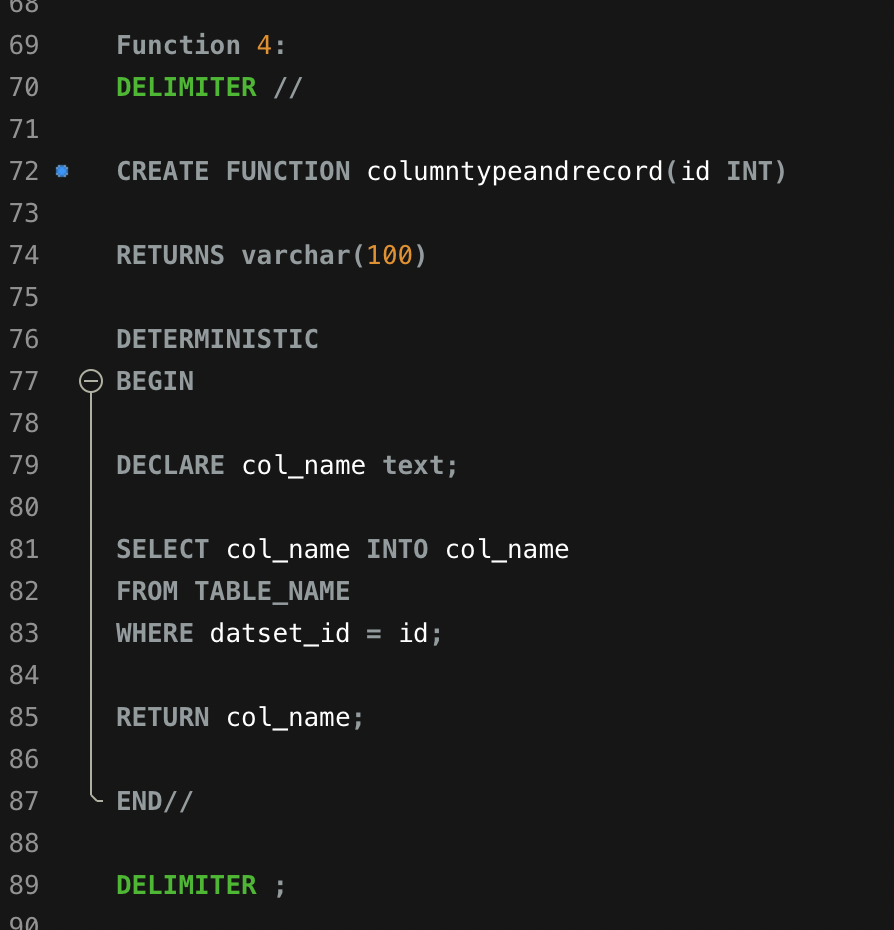

### 4.3 Views

_View 1:_ View where rmsle is not null.<br>

CREATE VIEW View_1 AS <br>
SELECT model_id, rmse,rmsle <br>
FROM leaderboard <br>
WHERE rmsle is NOT NULL; <br>

View 1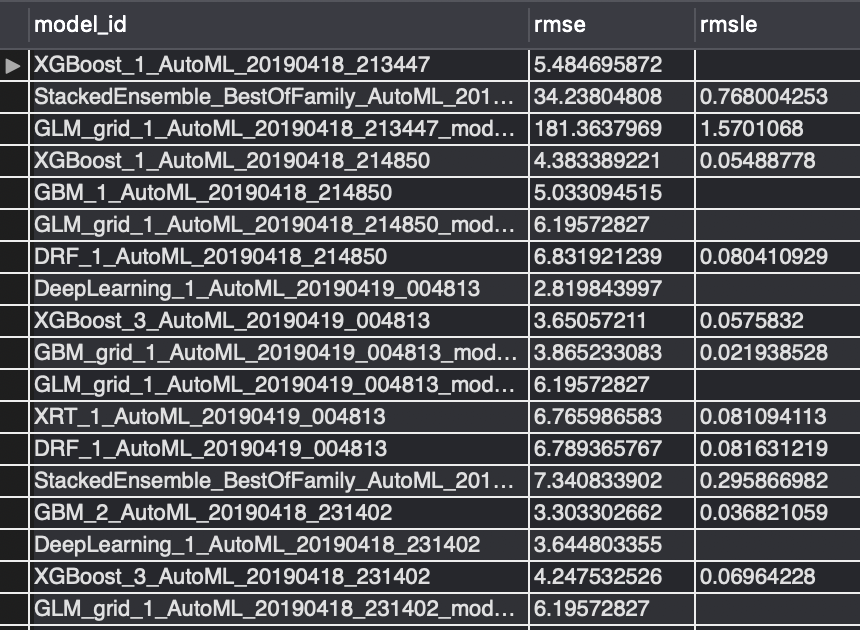

_View 2:_ View where mae>10 <br>

CREATE VIEW View_2 AS <br>
SELECT model_id, mae <br>
FROM leaderboard <br>
WHERE mae>10 ; <br>

View 2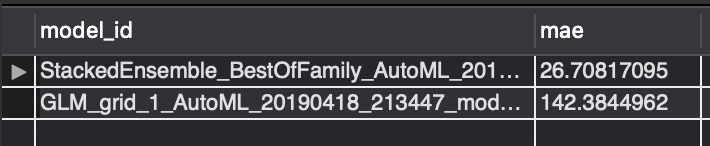

_View 3:_ View where mean residual deviance>1000<br>

CREATE VIEW View_3 AS <br>
SELECT model_id, mean_residual_deviance <br>
FROM leaderboard <br>
WHERE mean_residual_deviance>1000 ; <br>

View 3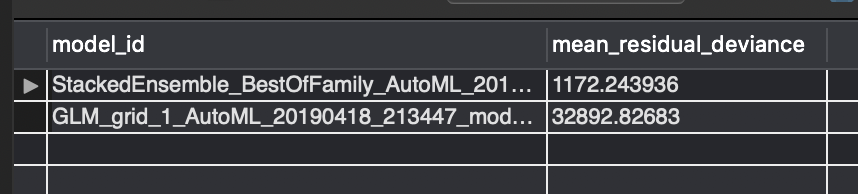

_View 4:_ View where rmse is NOT NULL. <br>

CREATE VIEW View_04 AS <br>
SELECT model_id, rmse <br>
FROM leaderboard <br>
where rmse is NOT NULL ; <br>

View 4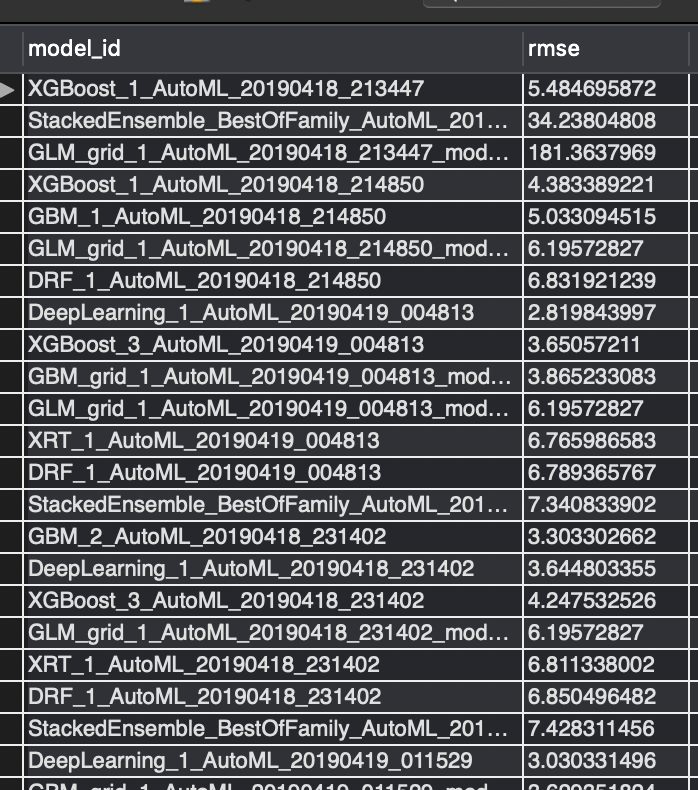

## 5 CONCLUSION

The aim of the project was successful and all the functions,use cases and views were written for the database. It helped to obtain the best hyperparameter suited according to various conditions used in use cases. Also, many important functions were created which could help in future works. Moreover, this project helped in understanding various factors which could affect users' behavior and which directly affects in the bike sharing businesses.

## 6 DISCUSSION

### 6.1 Evaluations and Limitations:

The aim of this project was to understand the important events in the city which could be detected via monitoring the data. However, it is difficult to consider all the factors required in a single project and the short span of time. There are many factors which can affect bike users' behavior.For example, any city can have bike races or bike marathons, larceny of bikes can also affect the behavior. Our job as a Data Analytics team was to design a proper structure for the data and populate that design it with the data provided by data science team, which was done successfully.

### 6.2 Future Work:

There are many factors which are not considered in this dataset, research can be done on those factors. Data science team can do research on factors like effect of pricing,marketing ,pollution, government policies, etc which directly afffects the users' bheavior. Moreover, comparing data from various countries and locations will give better results. As a Data Analytics team we can update the structure accordingly and more variables with cost effective model.

### 6.3 Contribution:

The contribution by both of us was equal in every task. However, the exact tasks done till now are as follows:

- __Palash Pramod Nimbalwar__ - 

1) Help with Python code for JSON to CSV.                                                                       
2) Normalization till 2NF.                                                                                           
3) ER Diagram.                                                                                                    
4) 2 Functions.                                                                                                    
5) Major Contribution in SQL Queries.                                                                              
6) 5 Use Cases.                                                                                                    
7) 2 Views.                                                                                                             

- __Siva Teja Reddy__ -

1) Major part in Pythin code for JSON to CSV.                                                                         
2) Normalization for 3NF.                                                                                             
3) Conceptual Schema.                                                                                                 
4) 2 Functions.                                                                                                       
5) Help in SQL Queries.                                                                                               
6) 5 Use Cases.                                                                                                       
7) 2 Views.                                                                                                           

### 6.4 References:

- __Dataset__:

[1] _Capital Bike Sharing System_. http://capitalbikeshare.com/system-data    
[2] _i-weather.com_. http://www.freemeteo.com

- __H2O__:

[1] _H20 AI_. https://www.h2o.ai/                                                                                   
[2] _Github, H2O Tutorials_. https://github.com/h2oai/h2o-tutorials  
[3] _H20 AI,Data Science_. http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html   

- __SQL__:

[1] _W3 schools_. https://www.w3schools.com/sql/default.asp      
[2] _Tutorials Point_. https://www.tutorialspoint.com/sql/    
[3] _Geeksforgeeks_. https://www.geeksforgeeks.org/sql-using-python/    

### 6.5 Appendix:

- _Github Link_ :  https://github.com/INFO6105-Spring19/hyperparameter-db-project-db_12

## License:

The text is released under the __[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode)__ , and Code is released under the MIT license __[MIT license](https://opensource.org/licenses/MIT)__ .